<a href="https://colab.research.google.com/github/FREDY129053/SkillBox_ML/blob/main/10_9_ML_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
# ваш код здесь
df_result = df.copy()

df_result.drop('State', axis=1, inplace=True)

df_result['International plan'] = np.where(df_result['International plan'] == 'Yes', 1, 0)
df_result['Voice mail plan'] = np.where(df_result['Voice mail plan'] == 'Yes', 1, 0)

df_result['Churn'] = np.where(df_result['Churn'] == True, 1, 0)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [3]:
# ваш код здесь
df_result.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [4]:
# ваш код здесь
X = df_result.drop(columns='Churn')
y = df_result['Churn']

In [5]:
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

Проверьте баланс классов. Является ли выборка сбалансированной?

In [7]:
# ваш код здесь
y.value_counts()
# Абсолютно нет

Churn
0    2850
1     483
Name: count, dtype: int64

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [16]:
from sklearn.model_selection import train_test_split

# ваш код здесь
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [17]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [18]:
# ваш код здесь
x_train_scale = pd.DataFrame(x_train_scale, index=x_train.index, columns=x_train.columns)
x_test_scale = pd.DataFrame(x_test_scale, index=x_test.index, columns=x_test.columns)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь
model_logreg = LogisticRegression()
model_logreg.fit(x_train_scale, y_train)

model_svc = SVC(probability=True, kernel='linear')
model_svc.fit(x_train_scale, y_train)

model_logreg_pred = model_logreg.predict_proba(x_test_scale)[:, 1]
model_svc_pred = model_svc.predict_proba(x_test_scale)[:, 1]

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте.

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [23]:
from sklearn.metrics import roc_auc_score

# ваш код здесь
print(f'Score Logistic Regression = {roc_auc_score(y_test, model_logreg_pred)}')
print(f'Score SVC = {roc_auc_score(y_test, model_svc_pred)}')

Score Logistic Regression = 0.828242935594161
Score SVC = 0.7401816386647191


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [24]:
from sklearn.tree import DecisionTreeClassifier

# ваш код здесь
model = DecisionTreeClassifier()

model.fit(x_train_scale, y_train)

pred = model.predict_proba(x_test_scale)[:, 1]

print(f'Score Tree = {roc_auc_score(y_test, pred)}')

Score Tree = 0.8332979739047417


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [25]:
# ваш код здесь
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.3, random_state=42)
x_train_tree_scale, x_test_tree_scale = scaler.fit_transform(x_train_tree), scaler.transform(x_test_tree)

model1 = DecisionTreeClassifier()
model1.fit(x_train_tree, y_train_tree)
pred1 = model1.predict_proba(x_test_tree)[:, 1]

print(f'Score Tree before scale = {roc_auc_score(y_test_tree, pred1)}')

model2 = DecisionTreeClassifier()
model2.fit(x_train_tree_scale, y_train_tree)
pred2 = model2.predict_proba(x_test_tree_scale)[:, 1]

print(f'Score Tree after scale = {roc_auc_score(y_test_tree, pred2)}')
# Масштабирование незначительно увеличило точность

Score Tree before scale = 0.8402991407658853
Score Tree after scale = 0.8356316961917896


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [26]:
from sklearn.model_selection import GridSearchCV

# ваш код здесь
params_logreg = {
    'C': np.linspace(0.1, 10, 2)
}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=10_000, n_jobs=-1, class_weight='balanced'), param_grid=params_logreg, cv=5, scoring='roc_auc', n_jobs=-1)
grid_logreg.fit(x_train_scale, y_train)

print('best score:', grid_logreg.best_score_)
print('best params:', grid_logreg.best_params_)

best score: 0.8070464737071766
best params: {'C': 10.0}


In [28]:
c = 0
score = -1
for C in np.linspace(0.1, 10, 2):
  model = SVC(class_weight='balanced', C=C, probability=True)
  model.fit(x_train_scale, y_train)
  pred = model.predict_proba(x_test_scale)[:, 1]
  roc_score = roc_auc_score(y_test, pred)
  if roc_score > score:
    score = roc_score
    c = C

print(f'Best score = {score}')
print(f'Best param C = {c}')

Best score = 0.9076221328263336
Best param C = 0.1


In [29]:
params = {'max_depth' : np.arange(1, 10),
          'criterion' : ['gini', 'entropy']}

gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='roc_auc')

gs.fit(x_train_scale, y_train)

print('best score:', gs.best_score_)
print('best params:', gs.best_params_)

best score: 0.8747349177703349
best params: {'criterion': 'gini', 'max_depth': 4}


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

Нарисуйте roc-кривую для наилучшей модели.

Text(0, 0.5, 'tpr')

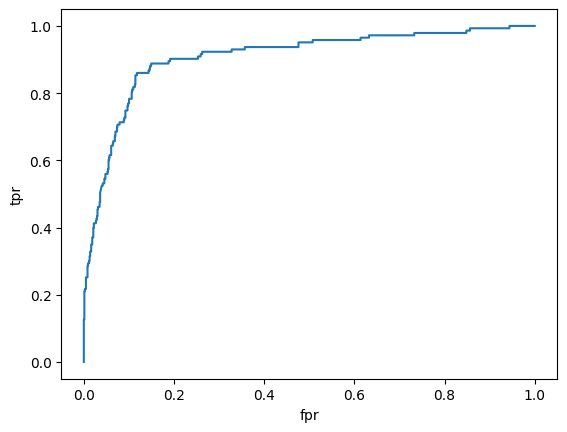

In [30]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# ваш код здесь
model = SVC(class_weight='balanced', C=0.1, probability=True)
model.fit(x_train_scale, y_train)
pred = model.predict_proba(x_test_scale)[:, 1]

fpr, tpr, _ = roc_curve(y_test, pred)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [31]:
# ваш код здесь
print(0.9076221328263336 - 0.8747349177703349)

0.032887215055998786


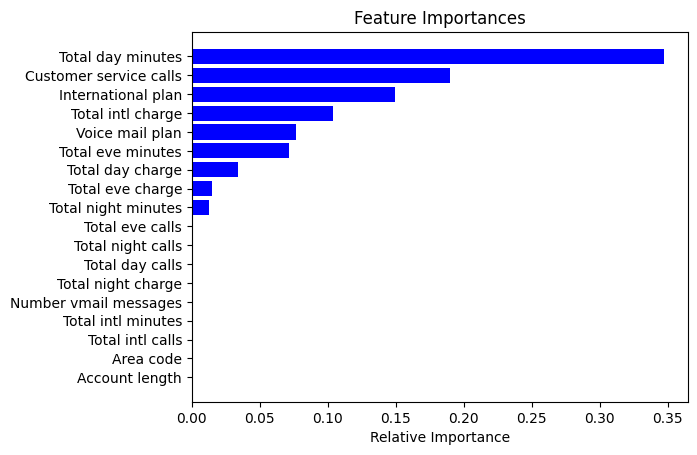

In [36]:
# ваш код здесь
model1 = LogisticRegression(max_iter=10_000, n_jobs=-1, class_weight='balanced', C=10.0)
model1.fit(x_train_scale, y_train)

model2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
model2.fit(x_train_scale, y_train)

features = x_train_scale.columns
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

1. Нет. Ну надо балансировать чтоб нормально предсказывать
2. SVC
3. Скорее нет. У каждого свои способы подсчета